In [1]:
from torchvision.models import detection
from torchvision.io import read_image,read_file
import numpy as np
import argparse
import torch
import torchvision.transforms as transforms
from PIL import Image


c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to the input image")
# ap.add_argument("-c", "--confidence", type=float, default=0.5,
# 	help="minimum probability to filter weak detections")
# args = vars(ap.parse_args())

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = transforms.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [4]:
classes=[]
with open("coco_classlabels.txt") as f:
    classes=[line.strip() for line in f.readlines()]

In [5]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CLASSES = classes
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [6]:
model = detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=True,
	num_classes=len(CLASSES), pretrained_backbone=True).to(DEVICE)

model.eval()

c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_uti

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [7]:
# image = Image.open('./sample.jpg')
# convert_tensor = transforms.ToTensor()
# pil_tensor = transforms.ToPILImage()
# image = convert_tensor(image)

In [8]:
# show(image)


In [9]:


# transform = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.ToTensor()
# ])

# transformed_image = transform(image)
# show(transformed_image)

# mean, std = transformed_image.mean([1,2]), transformed_image.std([1,2])
# transform_norm = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean, std),
# ])

# transformed_image = transform_norm(transformed_image)
# transformed_image = transformed_image.unsqueeze(0)

# transformed_image = transformed_image.to(DEVICE)


In [10]:
import cv2
image = cv2.imread('./sample.jpg')
orig = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, axis=0)
image = image / 255.0
image = torch.FloatTensor(image)
image = image.to(DEVICE)

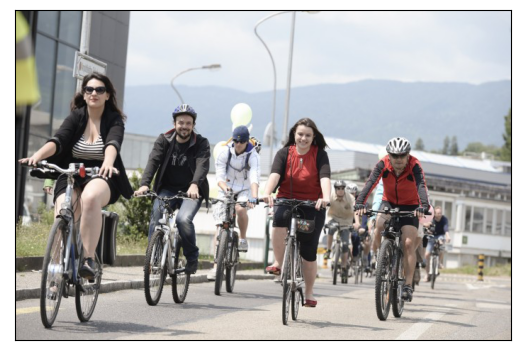

In [11]:
show(image)

In [12]:
detections = model(image)[0]

In [13]:
from torchvision.utils import draw_bounding_boxes

idx = detections['scores'] > 0.6
labels = [CLASSES[x-1] for x in detections['labels'][idx]]


image = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, axis=0)
image = torch.FloatTensor(image)
image = image.to(DEVICE)


In [14]:
# loop over the detections
for i in range(0, len(detections["boxes"])):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections["scores"][i]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > 0.97:
		# extract the index of the class label from the detections,
		# then compute the (x, y)-coordinates of the bounding box
		# for the object
		idx = int(detections["labels"][i])
		box = detections["boxes"][i].detach().cpu().numpy()
		(startX, startY, endX, endY) = box.astype("int")
		# display the prediction to our terminal
		label = "{}: {:.2f}%".format(CLASSES[idx-1], confidence * 100)
		print("[INFO] {}".format(label))
		# draw the bounding box and label on the image0
		cv2.rectangle(orig, (startX, startY), (endX, endY),
			COLORS[idx], 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		cv2.putText(orig, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
# show the output image
cv2.imwrite('./output.jpg', orig)

[INFO] person: 99.99%
[INFO] person: 99.96%
[INFO] person: 99.95%
[INFO] person: 99.94%
[INFO] bicycle: 99.76%
[INFO] person: 99.61%
[INFO] bicycle: 99.31%
[INFO] bicycle: 99.12%
[INFO] person: 99.11%
[INFO] person: 98.50%
[INFO] bicycle: 98.17%
